In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def Model(I, t, F,
                R,
                T,
                k_m,
                d_m,
                k_aq,
                d_cell,
                C_a,
                C_c,
                V_a,
                V_c,
                A_m,
                Y_ac,
                K_dec,
                f_x,
                Q_a,
                Q_c,
                C_Ac0,
                C_CO20,
                X_0,
                C_H0,
                C_O20,
                C_M0,
                C_OH0,
                U_0,
                k10,
                k20,
                K_Ac,
                K_O2,
                alpha,
                beta,
                i_0,
                b):
    
    C_Ac,C_CO2,C_H,X,C_O2,C_OH,C_M,eta_a,eta_c, i,E = I

    r1 = k10 * np.exp(alpha * F * eta_a / (R * T)) * C_Ac * X / (C_Ac + K_Ac)

    r2 = -k20 * np.exp((beta - 1) * F * eta_c / (R * T)) * C_O2 / (C_O2 + K_O2)

    dC_Ac = Q_a * (C_Ac0 - C_Ac) / V_a - A_m * r1 / V_a
    dC_CO2 = Q_a * (C_CO20 - C_CO2) / V_a + 2 * A_m * r1 / V_a
    dC_H = Q_a * (C_H0 - C_H) / V_a + 8 * A_m * r1 / V_a
    dX = (Q_a * (X_0 - X) / f_x + A_m*Y_ac*r1 - V_a*K_dec*X) / V_a

    

    N_M = 3600 * i / F

    dC_O2 = Q_c * (C_O20 - C_O2) / V_c + A_m * r2 / V_c
    dC_OH = Q_c * (C_OH0 - C_OH) / V_c + 4 * A_m * r2 / V_c
    dC_M = Q_c * (C_M0 - C_M) / V_c + N_M * A_m / V_c

    deta_a = (3600 * i - 8*F*r1) / C_a
    deta_c = (-3600 * i - 4*F*r2) / C_c

    di = 2 * i_0 * np.cosh(2.303 * eta_a / b) * deta_a
    dE = -deta_a + deta_c

    return np.array([dC_Ac, dC_CO2, dC_H, dX, dC_O2, dC_OH, dC_M, deta_a, deta_c, di,dE])



In [27]:
def solve(I,t):
    return odeint(Model,I,t,args=(96485.4, 8.314, 303, 17, 1.778e-4, 5, 2.2e-2, 4e2, 5e2, 5.5e-5, 5.5e-5, 5e-4, 0.05, 8.33e-4, 10, 2.25e-5, 1.11e-3, 1.56, 0, 0, 0, 0.3125, 0, 0, 0.77, 0.207, 3.288e-5, 0.592, 0.004, 0.051, 0.663,0.001,120))

In [7]:
from icecream import ic

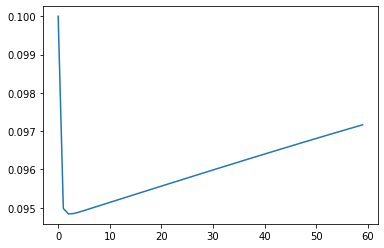

In [54]:
I = (1.56, 0.001, 1e-7, 0.5, 0.3125, 1e-7, 1e-7, 0.001, 0.001, 0.1,0.77)
t = np.arange(0,60,1)
res = solve(I,t)

eta_a = res[:,7]
eta_c = res[:,8]
i = res[:,9]
E = res[:,10]

U_0 = 0.77
A_m = 5e-4
d_m = 1.778e-4
k_m = 17
d_cell = 2.2e-2
k_aq = 5

#i = (U_0 - eta_a + eta_c) / (500 * A_m + d_m / k_m + d_cell / k_aq) 
#U = U_0 - eta_a + eta_c - (d_m / k_m + d_cell / k_aq) * i
plt.plot(t,i)